# BikeShare Visualization Project

* [Data Wrangling](#Data-Wrangling).
* [Exploratory Analysis](#Exploratory-Analysis).
    * [Univariate Visualizations](#Univariate-Visualizations).
    * [Bivariate Visualizations](#Bivariate-Visualizations).
    * [Multivariate Visualizations](#Multivariate-Visualizations).

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
%%time
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv',engine='c')

CPU times: user 524 ms, sys: 12.4 ms, total: 537 ms
Wall time: 538 ms


In [3]:
bike_data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


***
# Data Wrangling

In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

* [x] `start_time`,`end_time` needs to be converted to **datetime** object.
* [x] `start_station_id`,`end_station_id`,`bike_id` needs to be **object** datatype.

In [5]:
bike_data['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [6]:
bike_data['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

* [x] in `member_gender` must be catagorical datatye containing only `male`,`female`.

In [7]:
bike_data['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
bike_data['member_birth_year'].dropna().sort_values()

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
79886     2001.0
45335     2001.0
111857    2001.0
65310     2001.0
45338     2001.0
Name: member_birth_year, Length: 175147, dtype: float64

In [9]:
bike_data[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']].apply(np.sort)

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,37.317298,-122.453704,37.317298,-122.453704
1,37.317298,-122.453704,37.317298,-122.453704
2,37.317298,-122.453704,37.317298,-122.453704
3,37.317298,-122.453704,37.317298,-122.453704
4,37.318450,-122.453704,37.317298,-122.453704
...,...,...,...,...
183407,37.880222,-121.874119,37.880222,-121.874119
183408,37.880222,-121.874119,37.880222,-121.874119
183409,37.880222,-121.874119,37.880222,-121.874119
183410,37.880222,-121.874119,37.880222,-121.874119


## Cleanning 

* `start_time`,`end_time` needs to be converted to **datetime** object.

In [10]:
bike_data[['start_time','end_time']]=bike_data[['start_time','end_time']].apply(func=pd.to_datetime)
bike_data[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


*  `start_station_id`,`end_station_id`,`bike_id` needs to be **object** datatype.

In [11]:
bike_data[['start_station_id','end_station_id','bike_id']] = bike_data[['start_station_id','end_station_id','bike_id']].astype(dtype='object')
bike_data[['start_station_id','end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  183215 non-null  object
 1   end_station_id    183215 non-null  object
 2   bike_id           183412 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


* in `member_gender` must be catagorical datatye containing only `male`,`female`.

In [12]:
gender = pd.CategoricalDtype(categories=['Male','Female'],ordered=False)

In [13]:
bike_data['member_gender'] = bike_data['member_gender'].astype(gender)
bike_data['member_gender'].dtype

CategoricalDtype(categories=['Male', 'Female'], ordered=False)

In [14]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

***
# Exploratory Analysis

## Univariate Visualizations
in this document we will draw and show some analysis general analysis to cover some insights about our data and some of these analysis may not be related to the info we'll try to obtain in the **explonatory phase**.

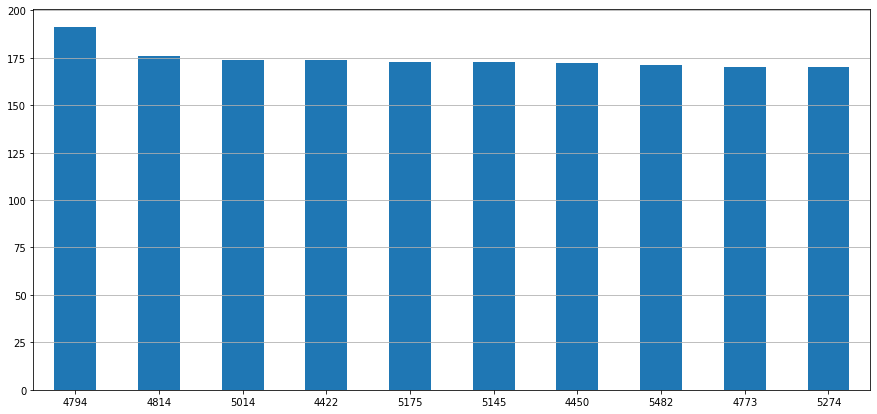

In [15]:
bike_data['bike_id'].value_counts().head(10).plot.bar(figsize=(15,7));
plt.grid(axis='y');
plt.xticks(rotation=0);

* **4794** is the most famous bike type used among users.

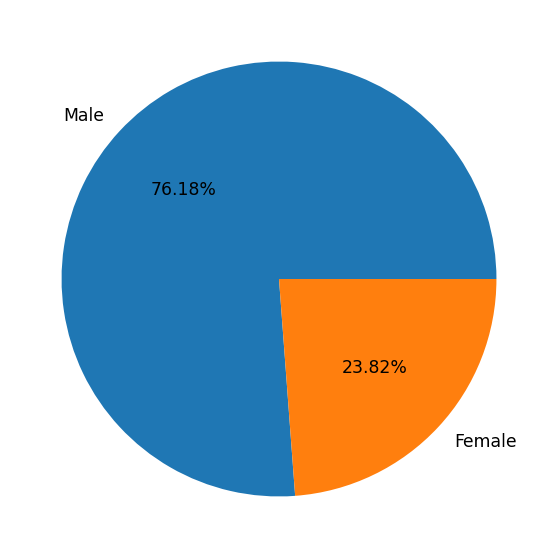

In [16]:
plt.figure(figsize=(10,10));
plt.pie(bike_data['member_gender'].value_counts(),autopct='%.2f%%',labels=bike_data['member_gender'].dropna().unique(),textprops={
    'fontsize':'xx-large'});

* **males** tend to ride bikes more than women by huge amount.

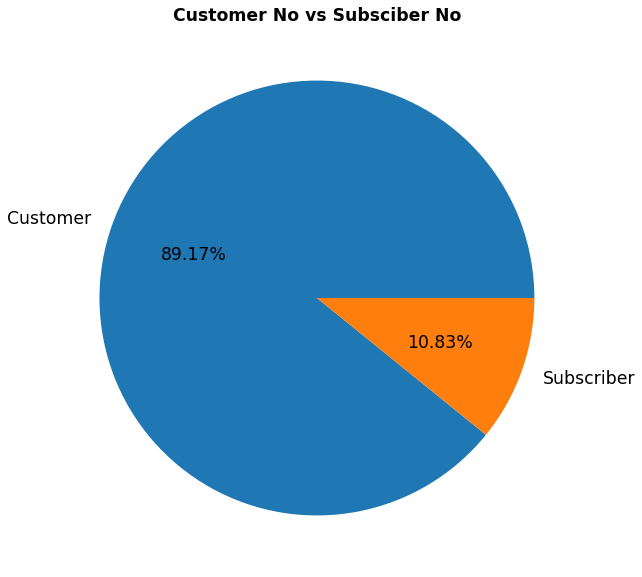

In [17]:
plt.figure(figsize=(10,10));
plt.pie(bike_data['user_type'].value_counts(),autopct='%.2f%%',labels=bike_data['user_type'].dropna().unique(),textprops={
    'fontsize':'xx-large'});
plt.title('Customer No vs Subsciber No',weight='bold',fontsize='xx-large');

* most of the bikers are the **Customer** type.

In [18]:
# the previous review says that the below cell didn't work correctly and said that I need to update my seaborn
# the cell below works fine FOR ME and the latest seaborn is updated and installed successfully on my system
# you can view the output in the HTML format
# the latest seaborn package is version 0.11.0
!!python3 -m pip show seaborn

['Name: seaborn',
 'Version: 0.11.0',
 'Summary: seaborn: statistical data visualization',
 'Home-page: https://seaborn.pydata.org',
 'Author: Michael Waskom',
 'Author-email: mwaskom@nyu.edu',
 'License: BSD (3-clause)',
 'Location: /usr/local/lib/python3.8/dist-packages',
 'Requires: numpy, pandas, matplotlib, scipy',
 'Required-by: ']

29

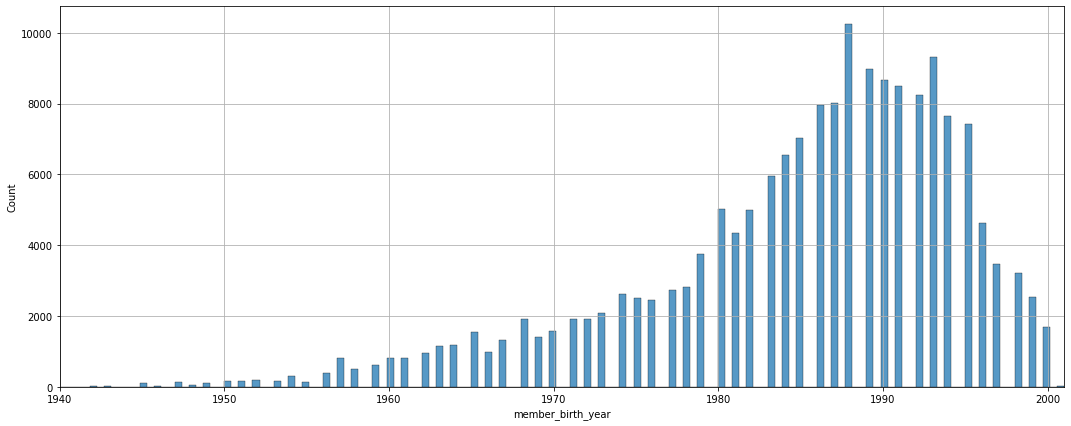

In [19]:
plt.figure(figsize=(18,7))
sb.histplot(data=bike_data,x='member_birth_year')
plt.xlim(1940,2001)
plt.grid(axis='both')
2019-1990

* most of the bikers are in their 30's years old.

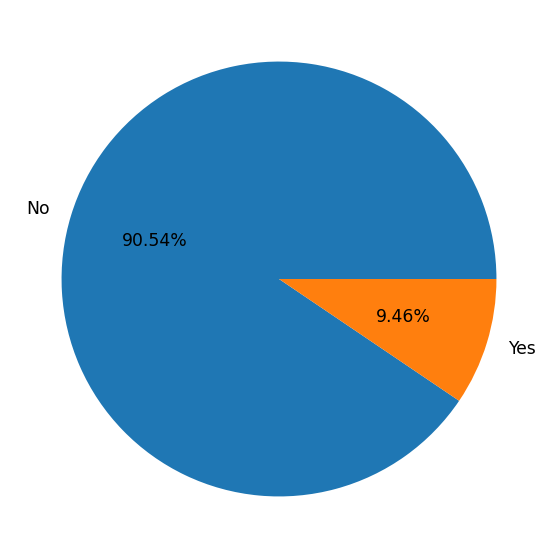

In [20]:
plt.figure(figsize=(10,10));
plt.pie(bike_data['bike_share_for_all_trip'].value_counts(),autopct='%.2f%%',labels=bike_data['bike_share_for_all_trip'].dropna().unique(),textprops={
    'fontsize':'xx-large'});

* most of the bikers have no sharing for all the trips.

CPU times: user 3.01 s, sys: 39.5 ms, total: 3.05 s
Wall time: 3.11 s


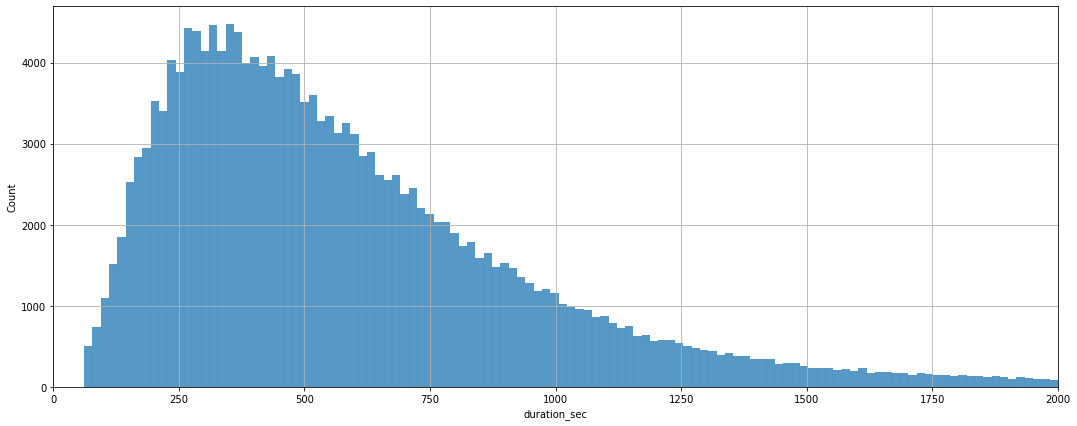

In [21]:
%%time
plt.figure(figsize=(18,7));
sb.histplot(data=bike_data,x='duration_sec');
plt.xlim(0,2000);
plt.grid(axis='both');

* most of the trip durations are 250~275 sec

In [22]:
bike_data['start_time'].dt.month.value_counts()

2    183412
Name: start_time, dtype: int64

* all the trips are taken in the second month of the year **February** regardless of the user type.

***
## Bivariate Visualizations

In [23]:
bike_data['start_time_day']=bike_data['start_time'].dt.day

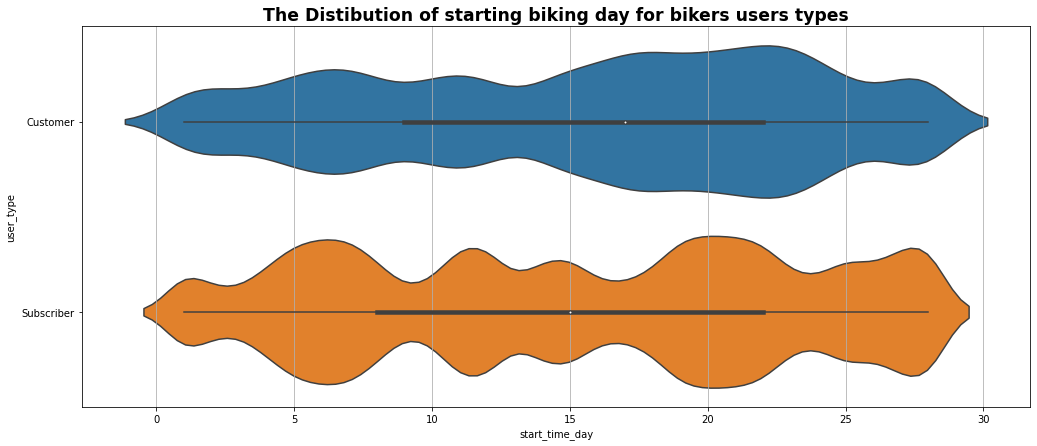

In [24]:
plt.figure(figsize=(17,7));
sb.violinplot(data=bike_data,x='start_time_day',y='user_type');
plt.grid(axis='x');
plt.title('The Distibution of starting biking day for bikers users types',fontsize='xx-large',weight='bold');

***
## Multivariate Visualizations

* for **subscriber** the starting day is in 6,7,20,21 and for **Cursotmer** 23,24.

In [25]:
bike_data['start_time_dayofweek'] = bike_data['start_time'].dt.dayofweek

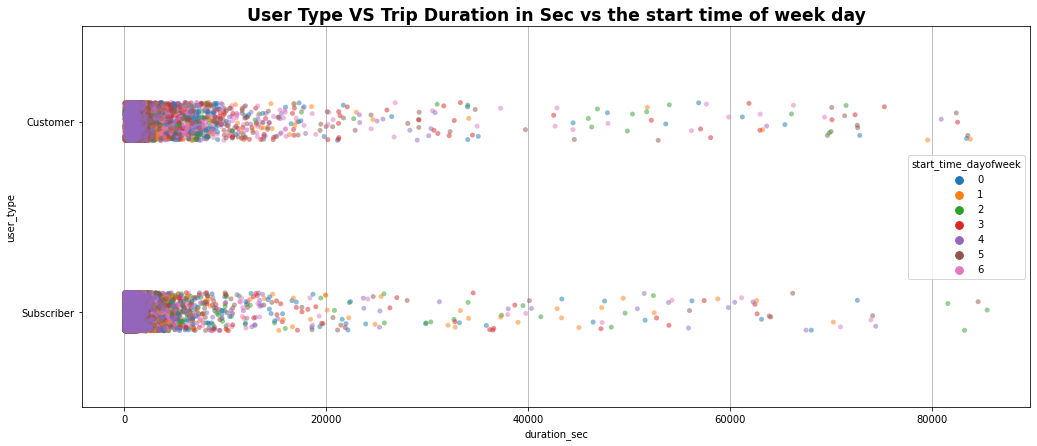

In [26]:
plt.figure(figsize=(17,7));
sb.stripplot(data=bike_data,x='duration_sec',y='user_type',hue='start_time_dayofweek',alpha=0.5);
plt.grid(axis='x');
plt.title('User Type VS Trip Duration in Sec vs the start time of week day',fontsize='xx-large',weight='bold');

In [27]:
import calendar
calendar.day_name[4]

'Friday'

* **Friday** is the most day the bikers take their rides regardless of their type.
* most of the trip lasts between 0~750 regardless of the biker user type.